# Análise da curva de tração e correção do módulo de elasticidade

## *Leonardo Sales Araujo*
### *PEMM/COPPE - Universidade Federal do Rio de Janeiro*

#### Este código foi desenvolvido em python e se destina ao tratamento dos arquivos .txt oriundos da Emic. Contudo, o código pode ser modificado para outros tipos de arquivos de dados.

<p style="background-color:red;color:white">IMPORTANTE: <br>1. no arquivo .txt você NÃO precisa trocar o separador decimal de vírgula para ponto;<br> 2. Apenas precisa apagar os acentos e caracteres "estranhos" do CABEÇALHO; <br>3. O arquivo .txt deve estar no MESMO DIRETÓRIO do arquivo de código python</p>

In [1]:
#importa base para tratar dados do arquivo
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#insere aviso para o arquivo a editar
print("----------\n>>>>ATENÇÃO!<<<<\n----------\n1) NO CABEÇALHO do arquito .txt, substituir ou apagar acentos e pontuações!!!")
print("2) COLOQUE OS ARQUIVOS QUE PRETENDE ABRIR NO MESMO DIRETÓRIO DO ARQUIVO .py"
      "\n----------------")

----------
>>>>ATENÇÃO!<<<<
----------
1) NO CABEÇALHO do arquito .txt, substituir ou apagar acentos e pontuações!!!
2) COLOQUE OS ARQUIVOS QUE PRETENDE ABRIR NO MESMO DIRETÓRIO DO ARQUIVO .py
----------------


### A próxima etapa consiste em carregar os dados e verificar a sua validade.

In [3]:
#informa o diretorio corrente
curDir = os.getcwd()
print(curDir)

#carrega o arquivo
nome_arquivo = input("informe o nome do arquivo: ")
id_legenda = input("Informe a identificação do CP para a legenda: ")


#carrega o arquivo .txt, ignorando o texto do cabeçalho
dados = pd.read_csv(nome_arquivo, encoding = "latin1", header = 0, decimal=".", sep='\t')

#verifica se os dados estao sendo corretamente lidos
print(dados.head())

#verifica o numero de linhas e colunas
dim_dados = dados.shape
print("---------")
print("Tamanho da base de dados: " + str(dim_dados))

#atribui as variaveis
tempo = dados.iloc[:,0]
desloc = dados.iloc[:,1]
forca = dados.iloc[:,2]

/Users/lsales/Documents/0_PY_proj/Ensaio_tracao
informe o nome do arquivo: CP_4-ZR.txt
Informe a identificação do CP para a legenda: CP
   Tempo(s)  Deformação(mm)  Força(N)
0       NaN        0.000000    1.6848
1      0.25        0.000345    3.3695
2      0.30        0.000690    3.3695
3      0.35        0.001122    3.3695
4      0.40        0.001467    3.3695
---------
Tamanho da base de dados: (2896, 3)


### Nessa parte são inseridos os dados do corpo de provas e seleciona-se a geometria do mesmo, de forma a carregar os dados dimensionais conrrespondentes

In [4]:
#insere os dados iniciais do CP e define se o CP eh quadrado, retangular ou circular
comprimento_util = float(input("Informe o comprimento util (mm): "))
geometria = int(input("Geometria do CP: \n >>1<< para cilindrica \n >>2<< para retangular \n >>3<< para quadrada \n Escolha: "))

if geometria == 1:
    diametro = float(input("Diametro (mm): "))
    area_transversal = np.pi*(diametro**2)/4

elif geometria == 2:
    largura = float(input("Insira a largura (mm): "))
    espessura = float(input("Insira a espessura (mm): "))
    area_transversal = largura*espessura

elif geometria == 3:
    largura = float(input("Insira a largura (mm): "))
    area_transversal = largura**2

else:
    print("Entrada invalida")

Informe o comprimento util (mm): 22.1
Geometria do CP: 
 >>1<< para cilindrica 
 >>2<< para retangular 
 >>3<< para quadrada 
 Escolha: 1
Diametro (mm): 4


### É importante lembrar que os dados obtidos pela máquina de tração são: tempo, **deslocamento** e **carga**. Precisa-se converter deslocamento e carga para tensão de engenharia e deformação de engenharia, usando os dados dimensionais dos corpos de prova que foram previamente inseridos. 

 ## $s = \frac{P}{A_{0}} = \frac{Carga}{Area \_ transversal}$
 ## $e=\frac{\delta l}{l_{0}} = \frac{deslocamento}{comprimento\_util}$

### Com isso, pode-se construir a curva tensão de engenharia x deformação de engenharia

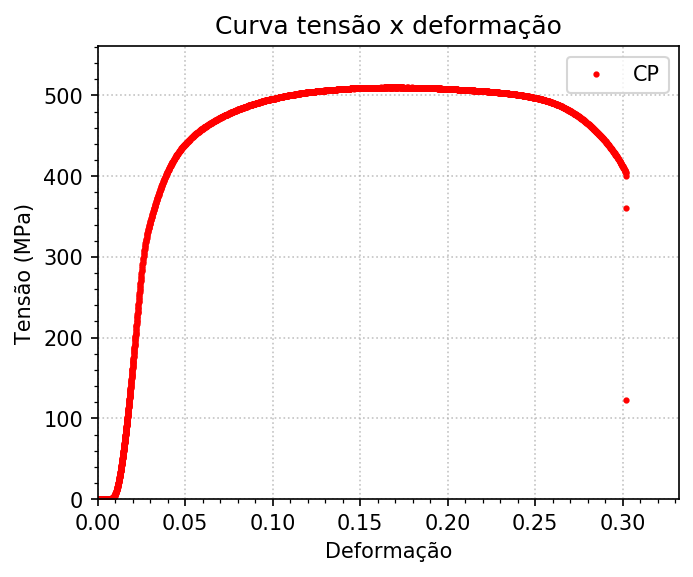

In [5]:
#define as variaveis de tensao e deformacao
deform = desloc/comprimento_util
tensao = forca/area_transversal

#plota o grafico tensao x deformacao
plt.figure(1,figsize=(5, 4), dpi=150)
plt.plot(deform, tensao, 'ro', markersize=2, markerfacecolor=None, label= id_legenda)
plt.title('Curva tensão x deformação')
plt.grid(alpha=0.75,linestyle=':')
plt.axis([0, 1.1*max(deform), 0, 1.1*max(tensao)])
plt.xlabel('Deformação')
plt.ylabel('Tensão (MPa)')
plt.minorticks_on()
plt.legend(loc='best')
plt.show(block=False)

### Há alguns casos onde, em função da fixação do CP e/ou da sua geometria, a região elástica não se manifesta completamente linear na curva. 

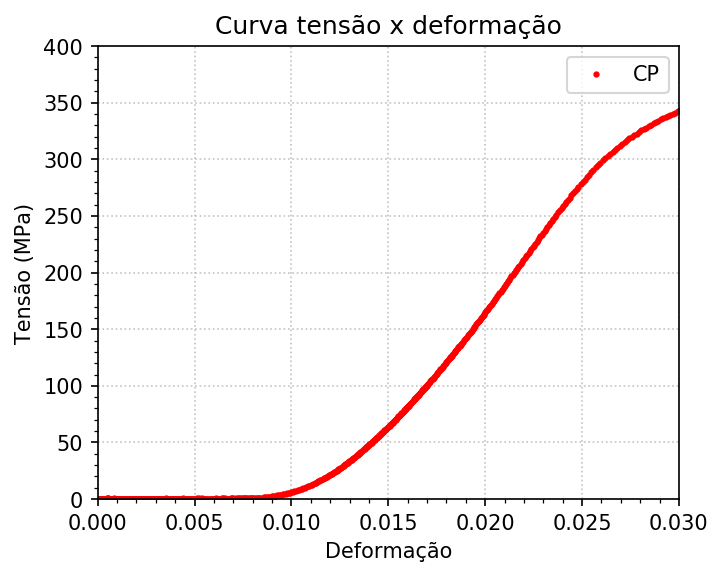

In [7]:
#plota uma região grafico tensao x deformacao
plt.figure(1,figsize=(5, 4), dpi=150)
plt.plot(deform, tensao, 'ro', markersize=2, markerfacecolor=None, label= id_legenda)
plt.title('Curva tensão x deformação')
plt.grid(alpha=0.75,linestyle=':')
plt.axis([0.000, 0.03, 0, 400])
plt.xlabel('Deformação')
plt.ylabel('Tensão (MPa)')
plt.minorticks_on()
plt.legend(loc='best')
plt.show(block=False)

### Nesse caso, se for tentada a linearização direnta da região elástica, pode haver um grande erro na definição do limite de escoamento. Por isso é preciso analisar a região linear antes de estabelecer a linha paralela a 0.002 (ou 0.2%), conhecido como "*método do offset*". Alternativamente, pode-se tentar observar a derivada da curva de tensão em relação à deformação.

### Gráfico $\frac{ds}{de} \times e$

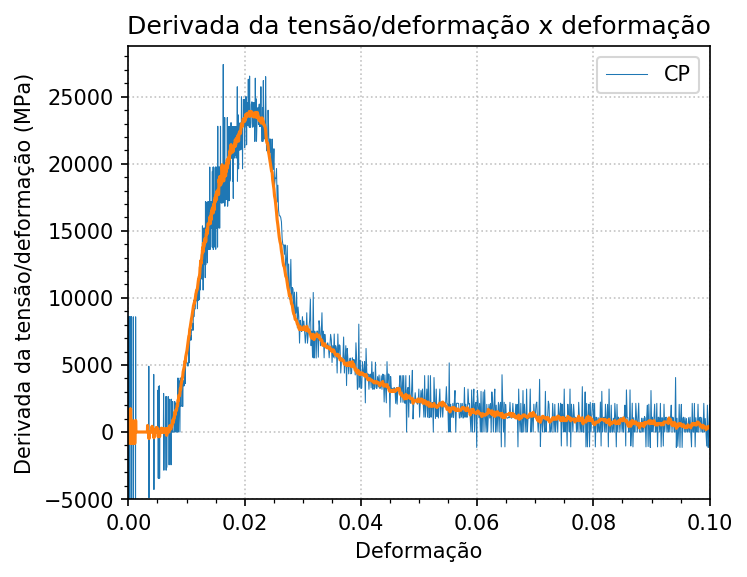

In [17]:
#derivada da tensão de engenharia pela deformação
derivada_tensao=np.diff(tensao)
derivada_deform=np.diff(deform)
ds_de=derivada_tensao/derivada_deform
deform_der = deform[:-1]

#determina a media movel
janela = 10
i = 0
media_movel = []
while i < len(ds_de)-janela+1:
    esta_janela = ds_de[i:i+janela]
    media_janela = sum(esta_janela)/janela
    media_movel.append(media_janela)
    i+=1
#ajusta a variável x para que tenha a mesma dimensão de y
deform_der_mm=deform_der[0:(len(deform_der)-janela+1)]    
    
plt.figure(2,figsize=(5, 4), dpi=150)
plt.title('Derivada da tensão/deformação x deformação')
plt.plot(deform_der, ds_de, linewidth=0.5,linestyle='-', label= id_legenda)
plt.plot(deform_der_mm,media_movel)
plt.grid(alpha=0.75,linestyle=':')
plt.axis([0, 0.1, -5000, 1.05*max(ds_de)])
plt.xlabel('Deformação')
plt.ylabel('Derivada da tensão/deformação (MPa)')
plt.minorticks_on()
plt.legend(loc = 'best')
plt.show(block=False)
plt.show()

### A partir dessa análise, pode-se definir um intervalo na região elástica o mais próximo quanto possível da linearidade e realizar uma regressão linear para se determinar os coeficientes e, consequentemente, o módulo de elasticidade.

### Esses valores serão importantes para a construção da reta paralela ("offset"), que cortará a curva e determinará o limite de escoamento do material.

In [15]:
#escolhe o intervalo para linearizar e criar a paralela de calculo do LE
intervalo_inferior_tensao = float(input("Valor inferior de tensao para linearizacao (MPa): "))
intervalo_superior_tensao = float(input("Valor superior de tensao para linearizacao (MPa): "))

#para evitar o erro ao detectar pontos na outra parte da curva
lr = max(tensao)
indices_maximo = [inicio for inicio, fim in enumerate(tensao) if fim == lr]
p_indice_maximo = indices_maximo[0]
print(indices_maximo)


#determina o indice do valor mais proximo aquele informado
indice_inferior = min(range(len(tensao[0:p_indice_maximo])), key=lambda i: abs(tensao[i]-intervalo_inferior_tensao))
indice_superior = min(range(len(tensao[0:p_indice_maximo])), key=lambda i: abs(tensao[i]-intervalo_superior_tensao))

#cria uma lista do intervalo e faz o ajuste linear
corte_deform = deform[indice_inferior:indice_superior+1]
corte_tensao = tensao[indice_inferior:indice_superior+1]
#faz o aluste da reta em funcao dos pontos
modelo = np.polyfit(corte_deform, corte_tensao, 1)
print("coeficientes de ajuste: " + str(modelo))


Valor inferior de tensao para linearizacao (MPa): 130
Valor superior de tensao para linearizacao (MPa): 230
[1787, 1789, 1847, 1849, 1852]
coeficientes de ajuste: [23124.54157024  -297.29631503]


<p style="color:red">Obs: Reparem que, para o valor do coeficiente "a", que representa o módulo de elasticidade, é bem menor que o valor real do material. Isso se dá porque a própria máquina de tração e seus componentes (como as garras) tem a sua rigidez e cedem durante o ensaio, bem como o ajuste do corpo de provas na fixação. Isso resulta em uma deformação adicional, o que interfere resultado. </p>

### A curva de ajuste pode ser analisada, bem como seus residuais.

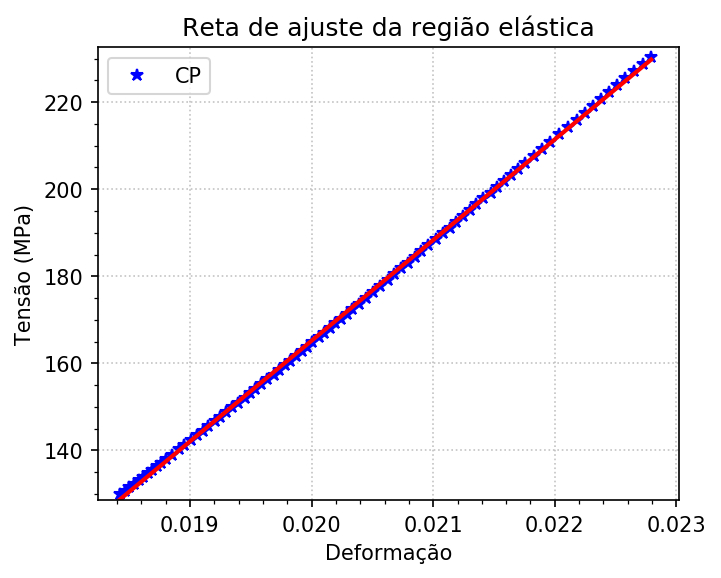

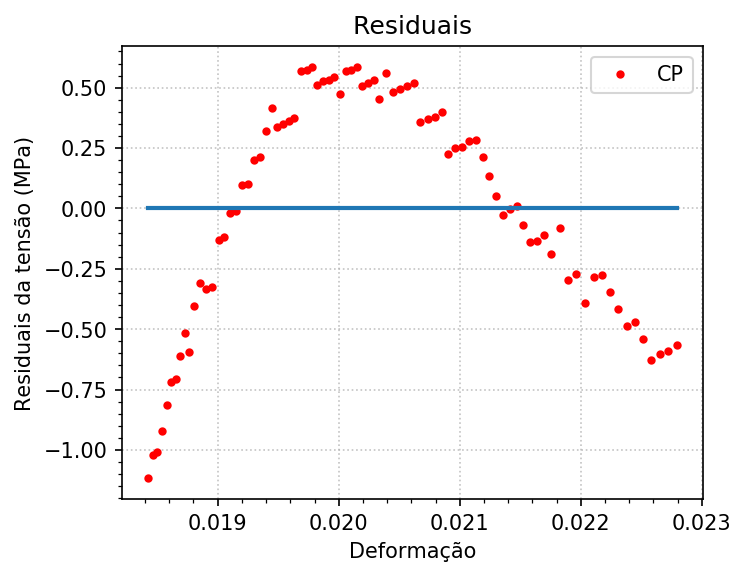

In [16]:
#informa os coeficientes a e b
plt.figure(3,figsize=(5, 4), dpi=150)
plt.plot(corte_deform, corte_tensao, 'b*', markersize=6, markerfacecolor=None, label= id_legenda)
plt.plot(corte_deform,modelo[0]*corte_deform+modelo[1],linewidth=2,color='red',linestyle='-')
plt.title('Reta de ajuste da região elástica')
plt.grid(alpha=0.75,linestyle=':')
plt.axis([0.99*min(corte_deform), 1.01*max(corte_deform), 0.99*min(corte_tensao), 1.01*max(corte_tensao)])
plt.xlabel('Deformação')
plt.ylabel('Tensão (MPa)')
plt.minorticks_on()
plt.legend()
plt.show(block=False)

#calcula os residuais e plota para comparacao
residuais = (modelo[0]*corte_deform+modelo[1])-corte_tensao
#plota o grafico
plt.figure(4,figsize=(5, 4), dpi=150)
plt.plot(corte_deform, residuais, 'ro', markersize=3, markerfacecolor=None, label= id_legenda)
plt.plot(corte_deform,0*residuais,linewidth=2)
plt.title('Residuais')
plt.grid(alpha=0.75,linestyle=':')
#plt.axis([0.95*min(corte_deform), 1.1*max(corte_deform), 0.95**min(residuais), 1.1*max(residuais)])
plt.xlabel('Deformação')
plt.ylabel('Residuais da tensão (MPa)')
plt.minorticks_on()
plt.legend()
plt.show(block=False)
plt.show()

### Com isso, pode-se construir a reta paralela ("*offset*"). Pelas especificações em norma, para os aços e ligas estruturais, quando não há limite de escoamento descontínuo, a determinação da propriedade se dá pelo "método do *offset*" na qual constrói-se uma reta paralela aquela relativa à região elástica, com uma defasagem de 0.002 ou 0.2%

-----------------
Limite de escoamento: 299.60 MPa
Limite de resistencia: 606.80 MPa
-----------------


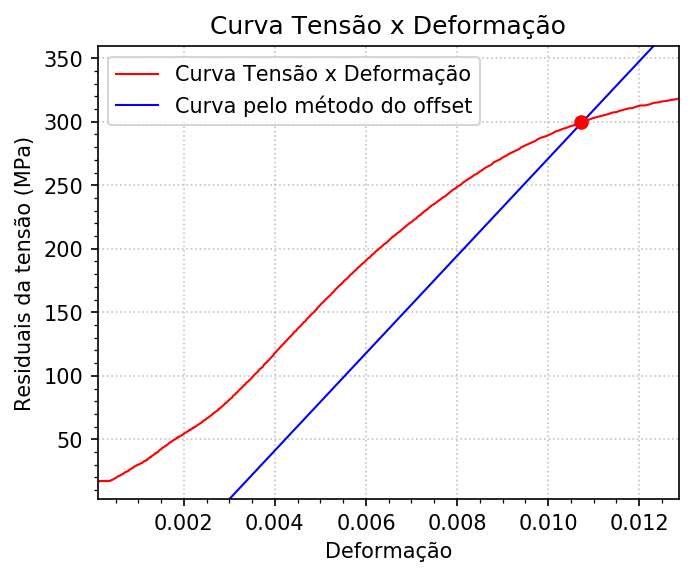

In [12]:
#determina o ponto onde as curvas se encontram para calcular o limite de escoamento

diferencas_curvas = tensao - (modelo[0]*(deform-0.002)+modelo[1])
for indle in range(len(diferencas_curvas) - 1):
    if diferencas_curvas[indle] == 0. or diferencas_curvas[indle] * diferencas_curvas[indle + 1] < 0.:
        limite_escoamento = tensao[indle]
        print("-----------------")
        print("Limite de escoamento: %.2f MPa" % limite_escoamento)
        print("Limite de resistencia: %.2f MPa" % max(tensao))
        print("-----------------")

#determina o indice mais proximo ao valor de limite de escoamento
indice_limite_escoamento = min(range(len(tensao)), key=lambda i: abs(tensao[i]-limite_escoamento))


#cria uma reta com a mesma inclinacao e desloca 0.0002

plt.figure(5,figsize=(5, 4), dpi=150)
plt.plot(deform, tensao, linewidth=1, color='red', linestyle='-', label='Curva Tensão x Deformação')
plt.plot(deform,modelo[0]*(deform-0.002)+modelo[1], linewidth=1,
         color='blue',linestyle='-', label='Curva pelo método do offset')
plt.plot(deform[indice_limite_escoamento], tensao[indice_limite_escoamento], 'ro')
plt.title('Curva Tensão x Deformação')
plt.grid(alpha=0.75,linestyle=':')
plt.axis([0.01*deform[indice_limite_escoamento], 1.2*deform[indice_limite_escoamento],
          0.01*tensao[indice_limite_escoamento], 1.2*tensao[indice_limite_escoamento]])
plt.xlabel('Deformação')
plt.ylabel('Residuais da tensão (MPa)')
plt.minorticks_on()
plt.legend()
plt.show(block=False)
plt.show()

### A representação das curvas nesse estado não é correta, dado que o módulo de elasticidade não está correto. Quando se realiza o ensaio concomitantemente ao uso de um extensômetro, somente a deformação do CP é medida e, consequentemente, a representação do módulo de elasticidade é correta.

### Contudo, caso o extensômetro não tenha sido usado no teste, há a possibilidade de corrigir a curva, contanto que se saiba o valor do módulo de elasticidade da liga (o que normalmente pode-se facilmente ser obtido através da literatura).

### Com esse valor, pode-se construir uma curva da região elástica, utilizando a lei de Hooke como referência:
### $s = Ee$,

### sendo E o módulo de elasticidade teórico e "e" a deformação obtida no ensaio.

In [ ]:
#entrada do valor do modulo de elasticidade
modulo_elasticidade = float(input("Inserir o módulo de elasticidade real do material (GPa): "))

#define a curva do modulo
tensao_modulo = (modulo_elasticidade*1000)*deform

#determina o indice mais proximo ao valor de limite de escoamento
indice_limite_escoamento_me = min(range(len(tensao_modulo)), key=lambda ime: abs(tensao_modulo[ime]-limite_escoamento))
delta_deform = deform[indice_limite_escoamento] - deform[indice_limite_escoamento_me]
#print("delta: " + str(delta_deform))

deform_corrigida = pd.concat([deform[0:indice_limite_escoamento_me],
                              (deform[indice_limite_escoamento:]-delta_deform)], ignore_index=True)

tensao_corrigida = pd.concat([tensao_modulo[0:indice_limite_escoamento_me],
                              tensao[indice_limite_escoamento:]], ignore_index=True)

### Com a curva obtida a partir do módulo da literatura, observar-se-á uma defasagem desta com a curva do ensaio. Portanto, uma correção deverá ser executada, unindo-se:
###    1. A parte elástica oriunda do cálculo com o módulo de elasticidade teórico;
###    2. A parte plástica da curva obtida com os dados verdadeiros;
### O ponto de corte de ambas pode ser definido pelo limite de escoamento, o qual marca a transição elasto-plástica;

![Ajuste da Curva](curva.jpg)

### Realizando-se essas etapas, a correção da curva pode ser realizada e a curva corrigida construída.

In [ ]:
#apresenta a curva tensão x deformação já corrigida
plt.figure(6,figsize=(5, 4), dpi=150)
plt.plot(deform_corrigida, tensao_corrigida, 'bo-', markersize=2, markerfacecolor='none', label= id_legenda)
plt.title('Curva tensão de engenharia x deformação de engenharia \n (com módulo já corrigido)')
plt.grid(alpha=0.75,linestyle=':')
plt.axis([0, 1.1*max(deform), 0, 1.1*max(tensao)])
plt.xlabel('Deformação')
plt.ylabel('Tensão (MPa)')
plt.minorticks_on()
plt.legend(loc='best')

#caso se queira salvar a imagem
plt.savefig("figura_Zr.jpg", dpi=150)

plt.show()




### A última etapa consiste de montar a curva tensão verdadeira x deformação verdadeira ($\sigma \times \epsilon$).
### Esta é importante pois desconsidera os efeitos geométricos do corpo de provas. As seguintes relações entre os valores de engenharia e verdadeiros são usadas:
## $\sigma = s(e + 1)$

## $\epsilon = ln(e+1)$

In [ ]:
#calcula as listas de tensao verdadeira e deformacao verdadeira

deformacao_verdadeira = np.log(deform_corrigida+1)
tensao_verdadeira = [a * b for a, b in zip(tensao_corrigida, (deform_corrigida+1))]

#determina o indice da curva corrigida do primeiro lr
lr_corrigido = max(tensao_corrigida)
indices_maximo_corrigida = [inicio2 for inicio2, fim2 in enumerate(tensao_corrigida) if fim2 == lr]
p_indice_max_corr = indices_maximo_corrigida[0]

plt.figure(7,figsize=(5, 4), dpi=150)
plt.plot(deformacao_verdadeira[0:p_indice_max_corr], tensao_verdadeira[0:p_indice_max_corr],
         'g*-', markersize=1.5, linewidth=0.5, markerfacecolor='none', label= 'Curva Verdadeira')
plt.plot(deform_corrigida, tensao_corrigida, 'bo-', markersize=1.5, linewidth=0.5, markerfacecolor='none', label= 'Curva de Engenharia')
plt.title('Curva tensão verdadeira x deformação verdadeira')
plt.grid(alpha=0.75,linestyle=':')
plt.axis([0, 1.1*max(deform_corrigida), 0, 1.1*max(tensao_verdadeira)])
plt.xlabel('Deformação verdadeira')
plt.ylabel('Tensão Verdadeira (MPa)')
plt.minorticks_on()
plt.legend(loc='best')
plt.show()

### Por fim, caso deseje-se salvar os dados corrigidos como um arquivo .csv:

In [ ]:
#escolhe se quer salvar o arquivo salva a curva corrigida para arquivo .csv
resultado = input("Quer salvar o arquivo? \n responder s ou n: ")

while True:
    if resultado == "s":
        dict = {'Deformacao_corrigida': deform_corrigida, 'Tensao_corrigida_MPa': tensao_corrigida,
                'Deformacao_verdadeira': deformacao_verdadeira, 'Tensao_Verdadeira_MPa': tensao_verdadeira}
        arquivo_exportar = pd.DataFrame(dict)
        prefixo_arquivo = input("Definir nome do arquivo (sem o .csv): ")
        arquivo_exportar.to_csv(prefixo_arquivo + '.csv', decimal=',', sep=' ')
        break
    elif resultado == "n":
        print("ok")
        break
    else:
        print("resposta desconhecida")